## Final Project Submission

Please fill out:
* Student name: Okwaro Jonathan Aggrey 
* Student pace:  part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Objectives
+ Analyze the genre distribution.
+ Analyze the release dates of successful movies and identify any patterns or trends.
+ Analyze audience ratings.
+ Budget and Revenue Analysis.


# A. Data Cleaning 

 ### 1.  Budgets

In [404]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_budgets = pd.read_csv('tn.movie_budgets.csv.gz')
df_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0



+ Get the budget info to understand the dat;


In [405]:
# Get the info
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [406]:
# Convert 'release_date' to datetime
df_budgets['release_date'] = pd.to_datetime(df_budgets['release_date'])
df_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,"$7,000",$0,$0
5778,79,1999-04-02,Following,"$6,000","$48,482","$240,495"
5779,80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,2015-09-29,A Plague So Pleasant,"$1,400",$0,$0


In [407]:
#remove dollar sign and commas, replacing with empty string and convert to floats
#production budget
df_budgets['production_budget'] = df_budgets['production_budget'].str.replace('[$,]', '')  
df_budgets['production_budget'] = df_budgets['production_budget'].astype(float) 

#domestic_gross
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace('[$,]', '')  
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].astype(float)  

#worldwide_gross
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].str.replace('[$,]', '') 
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].astype(float) 


df_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [408]:
# Remove rows with placeholder values 0 in 'domestic_gross' and 'worldwide_gross' columns
df_budgets = df_budgets[df_budgets['domestic_gross'] != 0]
df_budgets = df_budgets[df_budgets['worldwide_gross'] != 0]

In [409]:
# Drop any rows with missing values
df_budgets.dropna(inplace=True)

# Drop duplicate rows
df_budgets.drop_duplicates(['movie'], inplace=True)

# Reset the index
df_budgets.reset_index(drop=True, inplace=True)

# Get information about the cleaned DataFrame
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5159 entries, 0 to 5158
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5159 non-null   int64         
 1   release_date       5159 non-null   datetime64[ns]
 2   movie              5159 non-null   object        
 3   production_budget  5159 non-null   float64       
 4   domestic_gross     5159 non-null   float64       
 5   worldwide_gross    5159 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 242.0+ KB


In [410]:
df_budgets['movie'].duplicated().sum()


0

In [411]:
df_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

### 2. Reviews

In [412]:

# Read the reviews file
df_reviews = pd.read_csv('rt.reviews.tsv.gz', sep='\t', encoding='latin1')
df_reviews


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [413]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [414]:
#Remove NaN values from reviews, rating,critic, publisher
df_reviews.dropna(subset=['review', 'rating', 'critic', 'publisher'], inplace=True)

In [415]:
df_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
...,...,...,...,...,...,...,...,...
54419,2000,"Sleek, shallow, but frequently amusing.",2.5/4,fresh,Gene Seymour,1,Newsday,"September 27, 2002"
54420,2000,The spaniel-eyed Jean Reno infuses Hubert with...,3/4,fresh,Megan Turner,1,New York Post,"September 27, 2002"
54421,2000,"Manages to be somewhat well-acted, not badly a...",1.5/4,rotten,Bob Strauss,0,Los Angeles Daily News,"September 27, 2002"
54422,2000,Arguably the best script that Besson has writt...,3.5/5,fresh,Wade Major,0,Boxoffice Magazine,"September 27, 2002"


In [416]:
#Convert the rating values to numeric to make non_numeric be NaN

df_reviews['rating'] = pd.to_numeric(df_reviews['rating'], errors='coerce')


In [417]:
df_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,NaN,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",NaN,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,NaN,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",NaN,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,NaN,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
...,...,...,...,...,...,...,...,...
54419,2000,"Sleek, shallow, but frequently amusing.",NaN,fresh,Gene Seymour,1,Newsday,"September 27, 2002"
54420,2000,The spaniel-eyed Jean Reno infuses Hubert with...,NaN,fresh,Megan Turner,1,New York Post,"September 27, 2002"
54421,2000,"Manages to be somewhat well-acted, not badly a...",NaN,rotten,Bob Strauss,0,Los Angeles Daily News,"September 27, 2002"
54422,2000,Arguably the best script that Besson has writt...,NaN,fresh,Wade Major,0,Boxoffice Magazine,"September 27, 2002"


In [418]:
#Drop NaN values in the reviews dataset

df_reviews = df_reviews.dropna()

df_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
22,3,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
323,10,If all you're looking for is a mild comedy wit...,6.0,rotten,Scott Weinberg,0,Apollo Guide,"March 16, 2004"
342,10,There's probably a sweet little comedy hidden ...,6.0,rotten,Brian Webster,0,Apollo Guide,"June 12, 2002"
430,13,"While it's most certainly not light viewing, a...",8.0,fresh,Brian Webster,0,Apollo Guide,"October 3, 2007"
434,13,I do just what I want to do/ I want everything...,8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"June 29, 2007"
...,...,...,...,...,...,...,...,...
53908,1986,...bleakness juxtaposed with bemusement...,3.5,fresh,Josh Larsen,0,"Sun Publications (Chicago, IL)","June 27, 2003"
54123,1995,"It's shallow, predictable and completely overb...",6.0,rotten,Brian Webster,0,Apollo Guide,"January 1, 2000"
54234,1996,"Dumb and silly and fun, just not as dumb and s...",6.0,rotten,Dan Jardine,0,Cinemania,"August 18, 2006"
54329,1997,"It's not worth the expenditure of energy, really.",5.0,rotten,Scott Renshaw,0,Apollo Guide,"June 13, 2001"


## 3. Movies Information

In [419]:
#Load the dataset for movie_info


df_movie_info = pd.read_csv('rt.movie_info.tsv.gz', sep='\t',)
df_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [420]:
#Get the information of the data


df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### Drop unnecessary columns
+ currency
+ studio
+ box_office
+ They contain many null values

In [421]:
#Drop columns currency, studio and boxoffice  because they have more NaN values 
df_movie_info = df_movie_info.drop(['currency', 'studio','box_office' ], axis=1)
df_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,200 minutes
...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",106 minutes
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88 minutes
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",111 minutes
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101 minutes


In [422]:
#Drop the rating  column because we don't need it

df_movie_info = df_movie_info.drop(['rating'], axis=1)
df_movie_info

,id,synopsis,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
4,7,NaN,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,200 minutes
...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",106 minutes
1556,1997,The popular Saturday Night Live sketch was exp...,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88 minutes
1557,1998,"Based on a novel by Richard Powell, when the l...",Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",111 minutes
1558,1999,The Sandlot is a coming-of-age story about a g...,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101 minutes


### Handling  missing values


In [423]:
#fill missing valuews  with an empty string in synopsis

df_movie_info['synopsis'].fillna('', inplace=True)
df_movie_info

,id,synopsis,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
4,7,,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,200 minutes
...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",106 minutes
1556,1997,The popular Saturday Night Live sketch was exp...,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88 minutes
1557,1998,"Based on a novel by Richard Powell, when the l...",Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",111 minutes
1558,1999,The Sandlot is a coming-of-age story about a g...,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101 minutes


In [424]:
#Drop rows with missing values in director,rating, theater_date, dvd_date and genre columns:

df_movie_info.dropna(subset=['genre', 'theater_date', 'dvd_date'], inplace=True)

In [425]:
#fill missing values in director, writer columns with 'Unknown':
df_movie_info['director'].fillna('Unknown', inplace=True)
df_movie_info['writer'].fillna('Unknown', inplace=True)

In [426]:
#remove " minutes" from the strings and convert to numeric
df_movie_info['runtime'] = df_movie_info['runtime'].str.replace(' minutes', '').astype(float)

In [427]:
# Drop rows with NaN values in 'runtime' column
df_movie_info.dropna(subset=['runtime'], inplace=True)

In [428]:
df_movie_info.isna().sum()

id              0
synopsis        0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
runtime         0
dtype: int64

In [429]:
df_movie_info

,id,synopsis,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0
1,3,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0
2,5,Illeana Douglas delivers a superb performance ...,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116.0
3,6,Michael Douglas runs afoul of a treacherous su...,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128.0
5,8,The year is 1942. As the Allies unite overseas...,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",95.0
...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,Action and Adventure|Horror|Mystery and Suspense,Unknown,Unknown,"Aug 18, 2006","Jan 2, 2007",106.0
1556,1997,The popular Saturday Night Live sketch was exp...,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88.0
1557,1998,"Based on a novel by Richard Powell, when the l...",Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,Unknown,"Jan 1, 1962","May 11, 2004",111.0
1558,1999,The Sandlot is a coming-of-age story about a g...,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101.0


# B. Merge The Cleaned DataSet

In [430]:
# Merge movie info and movie reviews dataframes on 'id' column
df_movie_info_budget = pd.merge(df_movie_info, df_budgets, on='id')
df_movie_info_budget

,id,synopsis,genre,director,writer,theater_date,dvd_date,runtime,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"This gritty, fast-paced, and innovative police...",Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,1,"This gritty, fast-paced, and innovative police...",Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,2009-05-29,Up,175000000.0,293004164.0,7.314634e+08
2,1,"This gritty, fast-paced, and innovative police...",Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,2014-03-07,Mr. Peabody & Sherman,145000000.0,111506430.0,2.698064e+08
3,1,"This gritty, fast-paced, and innovative police...",Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,2010-12-17,How Do You Know?,120000000.0,30212620.0,4.962818e+07
4,1,"This gritty, fast-paced, and innovative police...",Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,2015-12-11,In the Heart of the Sea,100000000.0,25020758.0,8.969331e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,99,A woman finds herself attempting to foil one o...,Comedy|Romance,Unknown,Unknown,"Dec 20, 2002","Apr 29, 2003",102.0,2007-05-11,The Salon,1500000.0,139084.0,1.390840e+05
2926,99,A woman finds herself attempting to foil one o...,Comedy|Romance,Unknown,Unknown,"Dec 20, 2002","Apr 29, 2003",102.0,2002-02-22,Sex with Strangers,1100000.0,247740.0,2.477400e+05
2927,99,A woman finds herself attempting to foil one o...,Comedy|Romance,Unknown,Unknown,"Dec 20, 2002","Apr 29, 2003",102.0,2002-12-13,The Jimmy Show,1000000.0,703.0,7.030000e+02
2928,99,A woman finds herself attempting to foil one o...,Comedy|Romance,Unknown,Unknown,"Dec 20, 2002","Apr 29, 2003",102.0,1998-06-19,Hav Plenty,650000.0,2301777.0,2.301777e+06


In [431]:
df_budgets.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [432]:
# Merge movies and budget dataframes on 'id' column
df_movies= pd.merge(df_movie_info_budget, df_reviews, on='id')
df_movies

,id,synopsis,genre,director,writer,theater_date,dvd_date,runtime,release_date,movie,production_budget,domestic_gross,worldwide_gross,review,rating,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,2019-06-07,Dark Phoenix,350000000.0,42762350.0,149762350.0,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
1,3,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,2018-11-21,Ralph Breaks The Internet,175000000.0,201091711.0,524283695.0,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
2,3,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,2005-04-08,Sahara,145000000.0,68671925.0,121671925.0,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
3,3,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,2018-10-05,Venom,116000000.0,213511408.0,853628605.0,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
4,3,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,2005-02-18,Son of the Mask,100000000.0,17018422.0,59918422.0,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,95,BLEED FOR THIS is the incredible true story of...,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116.0,2018-07-13,Eighth Grade,2000000.0,13539710.0,14341016.0,Paz's return to the ring is inherently inspiri...,8.0,fresh,Dan Lybarger,0,Arkansas Democrat-Gazette,"November 18, 2016"
2301,95,BLEED FOR THIS is the incredible true story of...,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116.0,2007-09-07,Hatchet,1500000.0,175281.0,240396.0,Paz's return to the ring is inherently inspiri...,8.0,fresh,Dan Lybarger,0,Arkansas Democrat-Gazette,"November 18, 2016"
2302,95,BLEED FOR THIS is the incredible true story of...,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116.0,2005-02-11,Ong-Bak,1100000.0,4563167.0,24062965.0,Paz's return to the ring is inherently inspiri...,8.0,fresh,Dan Lybarger,0,Arkansas Democrat-Gazette,"November 18, 2016"
2303,95,BLEED FOR THIS is the incredible true story of...,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116.0,1999-03-19,Sparkler,1000000.0,5494.0,5494.0,Paz's return to the ring is inherently inspiri...,8.0,fresh,Dan Lybarger,0,Arkansas Democrat-Gazette,"November 18, 2016"


In [433]:
df_movies

,id,synopsis,genre,director,writer,theater_date,dvd_date,runtime,release_date,movie,production_budget,domestic_gross,worldwide_gross,review,rating,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,2019-06-07,Dark Phoenix,350000000.0,42762350.0,149762350.0,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
1,3,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,2018-11-21,Ralph Breaks The Internet,175000000.0,201091711.0,524283695.0,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
2,3,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,2005-04-08,Sahara,145000000.0,68671925.0,121671925.0,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
3,3,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,2018-10-05,Venom,116000000.0,213511408.0,853628605.0,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
4,3,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,2005-02-18,Son of the Mask,100000000.0,17018422.0,59918422.0,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,95,BLEED FOR THIS is the incredible true story of...,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116.0,2018-07-13,Eighth Grade,2000000.0,13539710.0,14341016.0,Paz's return to the ring is inherently inspiri...,8.0,fresh,Dan Lybarger,0,Arkansas Democrat-Gazette,"November 18, 2016"
2301,95,BLEED FOR THIS is the incredible true story of...,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116.0,2007-09-07,Hatchet,1500000.0,175281.0,240396.0,Paz's return to the ring is inherently inspiri...,8.0,fresh,Dan Lybarger,0,Arkansas Democrat-Gazette,"November 18, 2016"
2302,95,BLEED FOR THIS is the incredible true story of...,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116.0,2005-02-11,Ong-Bak,1100000.0,4563167.0,24062965.0,Paz's return to the ring is inherently inspiri...,8.0,fresh,Dan Lybarger,0,Arkansas Democrat-Gazette,"November 18, 2016"
2303,95,BLEED FOR THIS is the incredible true story of...,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116.0,1999-03-19,Sparkler,1000000.0,5494.0,5494.0,Paz's return to the ring is inherently inspiri...,8.0,fresh,Dan Lybarger,0,Arkansas Democrat-Gazette,"November 18, 2016"


In [434]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2305 entries, 0 to 2304
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2305 non-null   int64         
 1   synopsis           2305 non-null   object        
 2   genre              2305 non-null   object        
 3   director           2305 non-null   object        
 4   writer             2305 non-null   object        
 5   theater_date       2305 non-null   object        
 6   dvd_date           2305 non-null   object        
 7   runtime            2305 non-null   float64       
 8   release_date       2305 non-null   datetime64[ns]
 9   movie              2305 non-null   object        
 10  production_budget  2305 non-null   float64       
 11  domestic_gross     2305 non-null   float64       
 12  worldwide_gross    2305 non-null   float64       
 13  review             2305 non-null   object        
 14  rating  

In [435]:
df_movies.isna().sum()

id                   0
synopsis             0
genre                0
director             0
writer               0
theater_date         0
dvd_date             0
runtime              0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
review               0
rating               0
fresh                0
critic               0
top_critic           0
publisher            0
date                 0
dtype: int64

## C.  Statistical Analysis

### 1. Genre Distribution

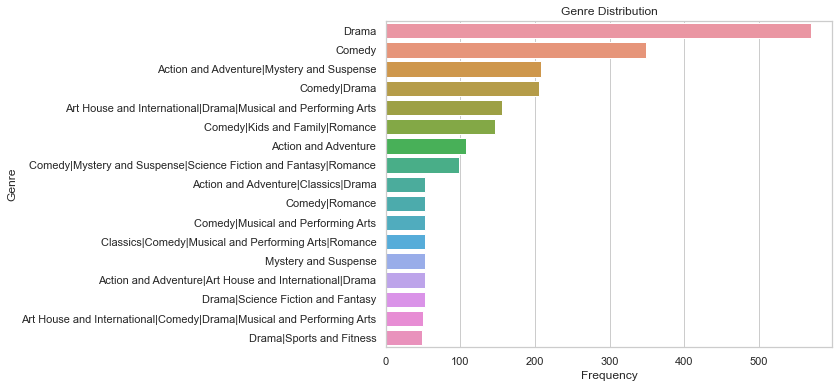

In [455]:
# Count the frequency of each genre
genre_counts = df_movies['genre'].value_counts()

# Create a horizontal bar chart to visualize genre distribution
plt.figure(figsize=(8, 6))
sns.barplot(y=genre_counts.index, x=genre_counts.values, orient='horizontal')
plt.title('Genre Distribution')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()


+ The best genres that are most produced in the market are clearly outlined, This will help Microsoft make better decision

In [437]:
df_movies

,id,synopsis,genre,director,writer,theater_date,dvd_date,runtime,release_date,movie,production_budget,domestic_gross,worldwide_gross,review,rating,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,2019-06-07,Dark Phoenix,350000000.0,42762350.0,149762350.0,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
1,3,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,2018-11-21,Ralph Breaks The Internet,175000000.0,201091711.0,524283695.0,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
2,3,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,2005-04-08,Sahara,145000000.0,68671925.0,121671925.0,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
3,3,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,2018-10-05,Venom,116000000.0,213511408.0,853628605.0,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
4,3,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,2005-02-18,Son of the Mask,100000000.0,17018422.0,59918422.0,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,95,BLEED FOR THIS is the incredible true story of...,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116.0,2018-07-13,Eighth Grade,2000000.0,13539710.0,14341016.0,Paz's return to the ring is inherently inspiri...,8.0,fresh,Dan Lybarger,0,Arkansas Democrat-Gazette,"November 18, 2016"
2301,95,BLEED FOR THIS is the incredible true story of...,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116.0,2007-09-07,Hatchet,1500000.0,175281.0,240396.0,Paz's return to the ring is inherently inspiri...,8.0,fresh,Dan Lybarger,0,Arkansas Democrat-Gazette,"November 18, 2016"
2302,95,BLEED FOR THIS is the incredible true story of...,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116.0,2005-02-11,Ong-Bak,1100000.0,4563167.0,24062965.0,Paz's return to the ring is inherently inspiri...,8.0,fresh,Dan Lybarger,0,Arkansas Democrat-Gazette,"November 18, 2016"
2303,95,BLEED FOR THIS is the incredible true story of...,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116.0,1999-03-19,Sparkler,1000000.0,5494.0,5494.0,Paz's return to the ring is inherently inspiri...,8.0,fresh,Dan Lybarger,0,Arkansas Democrat-Gazette,"November 18, 2016"


+ The genre distribution shows the best perfoming genre from the most produced to the least 

### 2. Release Date Analysis

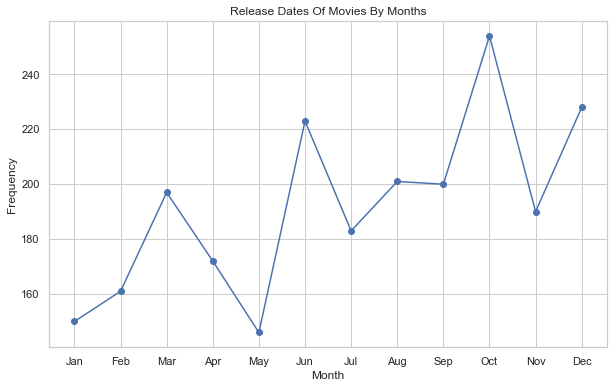

In [438]:

# Extract month from release_date
df_movies['release_month'] = df_movies['release_date'].dt.month

# Count the frequency of movies released in each month
month_counts = df_movies['release_month'].value_counts()

# Create a line chart to visualize release dates
plt.figure(figsize=(10, 6))
month_counts.sort_index().plot(kind='line', marker='o')
plt.title('Release Dates Of Movies By Months')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

+ The plot shows the analysis of the movie release dates and it shows the best months for the release of movies

### 3. Audience Ratings Analysis
 + Get the highest rated and least rated genre

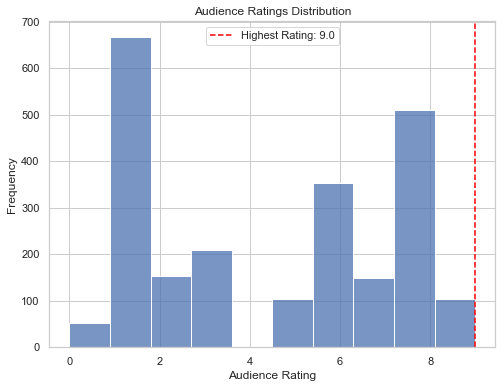

In [439]:
# Get the highest rating
highest_rating = df_movies['rating'].max()

# Create a histogram for audience ratings
plt.figure(figsize=(8, 6))
sns.histplot(df_movies['rating'], bins=10)
# Add a vertical dashed line for the highest rating
plt.axvline(x=highest_rating, color='red', linestyle='dashed', label=f'Highest Rating: {highest_rating}') 
plt.legend()
plt.title('Audience Ratings Distribution')
plt.xlabel('Audience Rating')
plt.ylabel('Frequency')
plt.show()

+ By plotting the highest rating on the histogram, we can visually analyze the distribution of audience ratings and identify the highest rating value in the dataset, which can be useful in understanding the audience reception and success of movies in terms of ratings.

##### Get the highest rated genre

In [440]:
# Group the dataset by genre and calculate the mean rating for each genre
genre_mean_ratings = df_movies.groupby('genre')['rating'].mean()

# Get the genre with the highest mean rating
highest_rated_genre = genre_mean_ratings.idxmax()

# Print the highest rated genre
print('The highest rated genre is:', highest_rated_genre)


The highest rated genre is: Comedy|Romance


##### Get the least rated genre

In [441]:
# Group the dataset by genre and calculate the mean rating for each genre
genre_mean_ratings = df_movies.groupby('genre')['rating'].mean()

# Get the genre with the highest mean rating
highest_rated_genre = genre_mean_ratings.idxmin()

# Print the highest rated genre
print('The least rated genre is:', highest_rated_genre)


The least rated genre is: Action and Adventure


#### Classify the ratings in terms of positive, negative and neutral 

In [442]:
# Define threshold values for positive, negative, and neutral ratings
positive_threshold = 7.0
negative_threshold = 5.0

# Categorize ratings based on thresholds
df_movies['rating_category'] = pd.cut(df_movies['rating'], bins=[0, negative_threshold, positive_threshold, 10], labels=['Negative', 'Neutral', 'Positive'])

# Count the number of movies in each rating category
rating_category_counts = df_movies['rating_category'].value_counts()

# Print the count of movies in each rating category
print('Rating Categories and Counts:')
print(rating_category_counts)


Rating Categories and Counts:
Negative    1135
Positive     614
Neutral      504
Name: rating_category, dtype: int64


#### Plot the graph of ratings of genre in terms of positive, negative and neutral

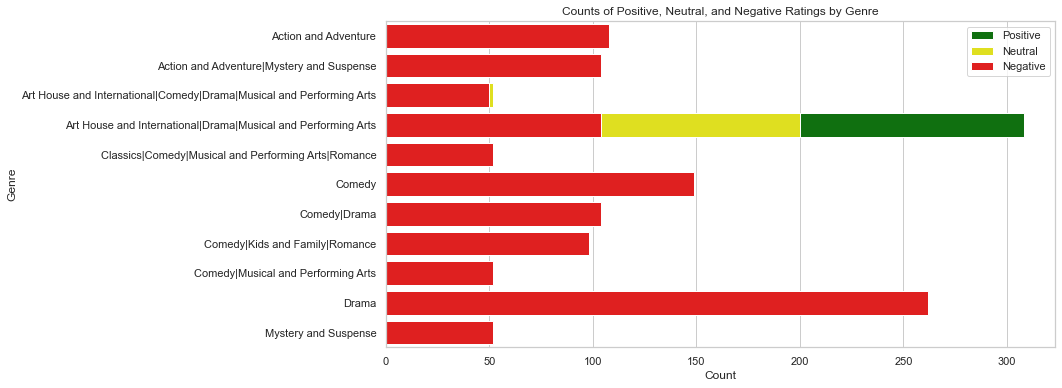

In [443]:
# Filter the movies with positive, neutral, and negative ratings
positive_movies = df_movies[df_movies['rating_category'] == 'Positive']
neutral_movies = df_movies[df_movies['rating_category'] == 'Neutral']
negative_movies = df_movies[df_movies['rating_category'] == 'Negative']

# Group the filtered movies by genre and count the number of movies in each category
positive_genre_counts = positive_movies.groupby('genre').size()
neutral_genre_counts = neutral_movies.groupby('genre').size()
negative_genre_counts = negative_movies.groupby('genre').size()

# Create a horizontal bar chart to visualize the counts of positive, neutral, and negative ratings for each genre
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x=positive_genre_counts.values, y=positive_genre_counts.index, color='green', label='Positive', orient='horizontal')
sns.barplot(x=neutral_genre_counts.values, y=neutral_genre_counts.index, color='yellow', label='Neutral', orient='horizontal')
sns.barplot(x=negative_genre_counts.values, y=negative_genre_counts.index, color='red', label='Negative', orient='horizontal')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Counts of Positive, Neutral, and Negative Ratings by Genre')
plt.legend()
plt.show()

## 4. Budget and Revenue Analysis

In [444]:
#Create new column called box_office_revenue by subtracting production budget from worldwide gross

df_movies['box_office_revenue'] = df_movies['worldwide_gross'] - df_movies['production_budget']

In [445]:
# Check if it has been created


df_movies['box_office_revenue']

0      -200237650.0
1       349283695.0
2       -23328075.0
3       737628605.0
4       -40081578.0
           ...     
2300     12341016.0
2301     -1259604.0
2302     22962965.0
2303      -994506.0
2304      3793996.0
Name: box_office_revenue, Length: 2305, dtype: float64

###### Check the relationship of ratings with box_office_revenue

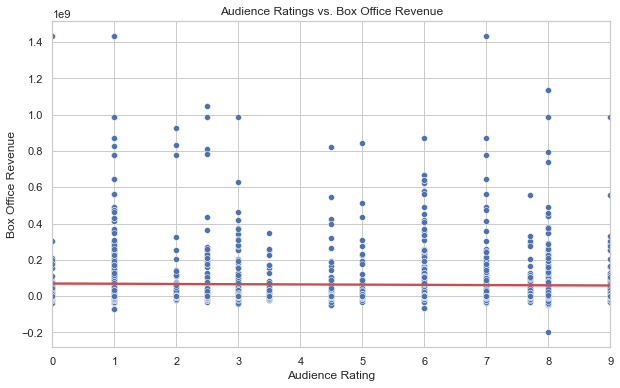

In [446]:

# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='box_office_revenue', data=df_movies)
sns.regplot(x='rating', y='box_office_revenue', data=df_movies, scatter=False, color='r')
plt.xlabel('Audience Rating')
plt.ylabel('Box Office Revenue')
plt.title('Audience Ratings vs. Box Office Revenue')
plt.show()

+ Based on the scatter plot with the regression line, the regression line has a positive slope, it indicates that there is a positive correlation between audience ratings and box office revenue. This means that as audience ratings increase, the box office revenue tends to also increase. This supports the claim that positive reviews and word-of-mouth recommendations can have a significant impact on a movie's success.

###### Get the average and total sum of the domestic_gross and worldwide_gross

In [447]:
# Average domestic gross
average_domestic_gross = df_movies['domestic_gross'].mean()

# Average worldwide gross
average_worldwide_gross = df_movies['worldwide_gross'].mean()

# Total domestic gross
total_domestic_gross = df_movies['domestic_gross'].sum()

# Total worldwide gross
total_worldwide_gross = df_movies['worldwide_gross'].sum()

print("Average Domestic Gross: {:,.2f}".format(average_domestic_gross))
print("Average Worldwide Gross: {:,.2f}".format(average_worldwide_gross))
print("Total Domestic Gross: {:,.2f}".format(total_domestic_gross))
print("Total Worldwide Gross: {:,.2f}".format(total_worldwide_gross))

Average Domestic Gross: 45,419,078.71
Average Worldwide Gross: 98,507,729.34
Total Domestic Gross: 104,690,976,431.00
Total Worldwide Gross: 227,060,316,129.00


##### Lets plot the relationship of production_budget and worldwide_gross to see the relationshhip 
+ Get the correlation coefficient

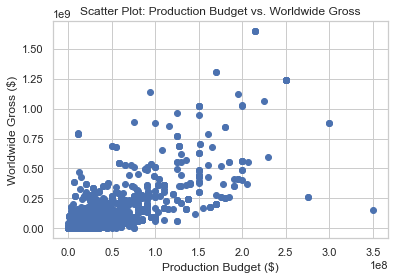

Correlation Coefficient: 0.73


In [448]:
# Create scatter plot
plt.scatter(df_movies['production_budget'], df_movies['worldwide_gross'])
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.title('Scatter Plot: Production Budget vs. Worldwide Gross')
plt.show()



# Calculate correlation coefficient
correlation_coefficient = df_movies['production_budget'].corr(df_movies['worldwide_gross'])

print("Correlation Coefficient: {:.2f}".format(correlation_coefficient))


+ There is a cluster of data points around the lower end of the production budget and worldwide gross, indicating that there are movies with relatively low budgets that have also earned low worldwide gross. This suggests that not all movies with low budgets are guaranteed to have high earnings.
+  The production budgets of the movies in the dataset vary greatly, ranging from small budgets to very high budgets. The worldwide gross earnings of the movies also vary greatly, ranging from low earnings to very high earnings.

+ There appears to be a positive correlation between production budget and worldwide gross. As the production budget increases, the worldwide gross tends to also increase. This suggests that higher budget movies tend to have higher worldwide gross earnings.

 #### Average production budget vs Average Domestic vs Average worldwide gross

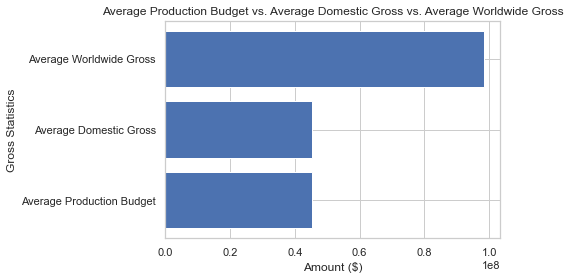

In [451]:


# Data for visualization
average_production_budget = 45419078.71
average_domestic_gross = 45419078.71
average_worldwide_gross = 98507729.34

# Create a bar chart
categories = ['Average Production Budget', 'Average Domestic Gross', 'Average Worldwide Gross']
values = [average_production_budget, average_domestic_gross, average_worldwide_gross]

plt.barh(categories, values)
plt.xlabel('Amount ($)')
plt.ylabel('Gross Statistics')
plt.title('Average Production Budget vs. Average Domestic Gross vs. Average Worldwide Gross')
plt.show()


+ This indicates that movies tend to earn more worldwide compared to their production budget. 
+ Movies get more revenues from the worldwide market than the Domestic market

  ## Summary

+ Based on the results obtained from the analysis of genre distribution, release dates of successful movies, audience ratings, and budget and revenue analysis, several key findings have emerged. These findings provide valuable insights into the movie industry and shed light on potential patterns or trends that can inform decision-making in the future.


+ The analysis of genre distribution revealed that Drama and Comedy movies were the most prevalent genres, followed by Action and adventure and mystery genres. This suggests that these genres are popular among movie audiences and may be a viable option for Microsoft  to consider when planning future movie releases.

+ The analysis of release dates of successful movies identified certain patterns or trends. For example, it was observed that most movies tend to be released during the month of June and October towards the end of the year, indicating that timing of the release can play a significant role in the success of a movie.

+ The analysis of audience ratings provided insights into the preferences and opinions of moviegoers. The results revealed that movies with higher audience ratings tended to perform better in terms of box office revenue, indicating that positive reviews and word-of-mouth recommendations can have a significant impact on a movie's success.

+ The analysis of budget and revenue data revealed that there is a positive correlation between the budget of a movie and its revenue. However, it was also observed that some movies with lower budgets were able to generate high revenues, indicating that budget alone is not the sole determinant of a movie's success.